In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = pd.read_csv("RELIANCE.csv")
a = pd.read_csv("ADANIENT.csv")

In [3]:
r = r.iloc[:, [0, -3]]
a = a.iloc[:, [0,-3]]

In [4]:
r.rename(columns={'Close':'Price(Reliance)'}, inplace=True)
a.rename(columns={'Close':'Price(Adani)'}, inplace=True)

In [5]:
r

,Date,Price(Reliance)
0,2024-02-02,2915.399902
1,2024-02-05,2878.050049
2,2024-02-06,2855.600098
3,2024-02-07,2884.300049
4,2024-02-08,2900.250000


In [6]:
a

,Date,Price(Adani)
0,2024-02-02,3157.449951
1,2024-02-05,3173.449951
2,2024-02-06,3203.750000
3,2024-02-07,3229.850098
4,2024-02-08,3168.600098


In [7]:
df = a.merge(r, on='Date')
df

,Date,Price(Adani),Price(Reliance)
0,2024-02-02,3157.449951,2915.399902
1,2024-02-05,3173.449951,2878.050049
2,2024-02-06,3203.750000,2855.600098
3,2024-02-07,3229.850098,2884.300049
4,2024-02-08,3168.600098,2900.250000


In [8]:
def R(price_col):
    first_row = [0]
    for i in range(1, len(price_col)):
        first_row.append(((price_col[i]-price_col[i-1])/(price_col[i-1]))*100)
    return np.array(first_row).round(2)
df['R(A)'] = R(df.iloc[:, 1])
df['R(R)'] = R(df.iloc[:, 2])

In [9]:
df

,Date,Price(Adani),Price(Reliance),R(A),R(R)
0,2024-02-02,3157.449951,2915.399902,0.00,0.00
1,2024-02-05,3173.449951,2878.050049,0.51,-1.28
2,2024-02-06,3203.750000,2855.600098,0.95,-0.78
3,2024-02-07,3229.850098,2884.300049,0.81,1.01
4,2024-02-08,3168.600098,2900.250000,-1.90,0.55


In [10]:
E_R_A = df.iloc[:, -2].mean()
E_R_B = df.iloc[:, -1].mean()


In [11]:
outcomes = np.array([0.1,0.4,0.3,0.2])
p = np.array([2.5,-0.5,1,13])
t = np.array([6,7.5,2,-3])
np.dot(outcomes, (p-2.95)**2)

26.122500000000006

In [12]:
r = 0
for i, j in enumerate(outcomes):
    r += j*t[i]*p[i]
r-(2.95)*(3.6)

-17.82

In [13]:
E_R_A, E_R_B

(0.07400000000000002, -0.1)

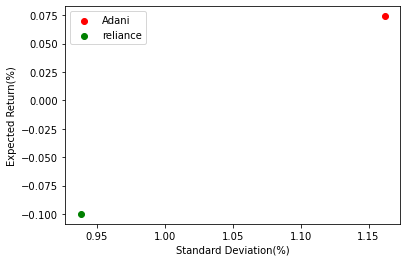

In [14]:
plt.scatter([df['R(A)'].std()], [df['R(A)'].mean()], color='r', label='Adani')
plt.scatter([df['R(R)'].std()], [df['R(R)'].mean()], color='g', label='reliance')
plt.xlabel("Standard Deviation(%)")
plt.ylabel("Expected Return(%)")
plt.legend()
plt.show()

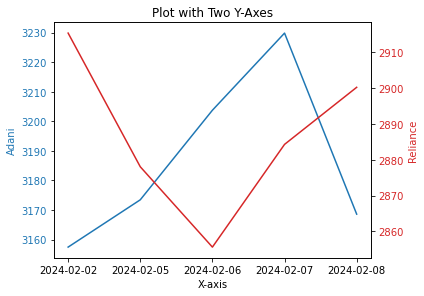

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = df['Date']
y1 = df.iloc[:,1]
y2 = df.iloc[:,2]

# Create the first plot and y-axis
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Adani', color=color)
ax1.plot(df['Date'], y1, label='sin(x)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Reliance', color=color)
ax2.plot(x, y2, label='cos(x)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
fig.tight_layout()
plt.title('Plot with Two Y-Axes')
plt.show()



In [16]:
df

,Date,Price(Adani),Price(Reliance),R(A),R(R)
0,2024-02-02,3157.449951,2915.399902,0.00,0.00
1,2024-02-05,3173.449951,2878.050049,0.51,-1.28
2,2024-02-06,3203.750000,2855.600098,0.95,-0.78
3,2024-02-07,3229.850098,2884.300049,0.81,1.01
4,2024-02-08,3168.600098,2900.250000,-1.90,0.55


In [17]:
df2 = pd.DataFrame({
    'Exp Return(A)':df.iloc[:, -2].mean(),
    'Standard Deviation(A)':df.iloc[:, -2].std(),
    'Exp Return(B)':df.iloc[:, -1].mean(),
    'Standard Deviation(B)':df.iloc[:, -1].std()
}, index=[0])
df2

,Exp Return(A),Standard Deviation(A),Exp Return(B),Standard Deviation(B)
0,0.074,1.162037,-0.1,0.938003


In [18]:
def getport(EA, ER, W1, W2):
    return np.dot(np.array([W1, W2]), np.array([EA, ER]))

In [19]:
getport(df2.iloc[:, 0], df2.iloc[:, 2], 0.5, 0.5)

array([-0.013])

In [20]:
df['Portolio Return(0.5 + 0.5)'] = 0.5*(df.iloc[:,3]) + 0.5*(df.iloc[:, 4])

df

,Date,Price(Adani),Price(Reliance),R(A),R(R),Portolio Return(0.5 + 0.5)
0,2024-02-02,3157.449951,2915.399902,0.00,0.00,0.000
1,2024-02-05,3173.449951,2878.050049,0.51,-1.28,-0.385
2,2024-02-06,3203.750000,2855.600098,0.95,-0.78,0.085
3,2024-02-07,3229.850098,2884.300049,0.81,1.01,0.910
4,2024-02-08,3168.600098,2900.250000,-1.90,0.55,-0.675


In [21]:
df2['Portfolio Return'] = df.iloc[:, -1].mean()
df2['Standard Deviation(Port)'] = df.iloc[:, -1].std()
df2

,Exp Return(A),Standard Deviation(A),Exp Return(B),Standard Deviation(B),Portfolio Return,Standard Deviation(Port)
0,0.074,1.162037,-0.1,0.938003,-0.013,0.599652


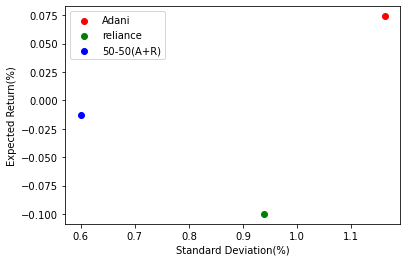

In [22]:
plt.scatter([df['R(A)'].std()], [df['R(A)'].mean()], color='r', label='Adani')
plt.scatter([df['R(R)'].std()], [df['R(R)'].mean()], color='g', label='reliance')
plt.scatter(df2.iloc[:, -1], df2.iloc[:, -2], color='blue', label='50-50(A+R)')
plt.xlabel("Standard Deviation(%)")
plt.ylabel("Expected Return(%)")
plt.legend()
plt.show()

In [23]:
combos = []

for i in range(1, 100):
    j = 100-i
    combos.append([i, j])
combos = np.array(combos)/100

def getport_std(w1, w2):
    list_of_returns = w1*(df.iloc[:,3]) + w2*(df.iloc[:, 4])
    return list_of_returns.std()
def getport_return(w1, w2):
    list_of_returns = w1*(df.iloc[:,3]) + w2*(df.iloc[:, 4])
    return list_of_returns.mean()
#EA, ER, W1, W2
#port_return = getport(df2.iloc[:, 0], df2.iloc[:, 2], w2, w1)


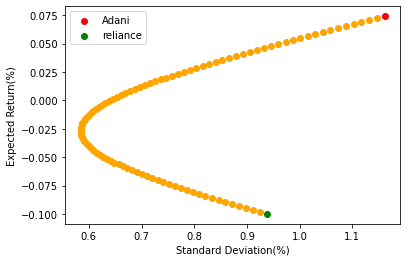

In [24]:
plt.scatter([df['R(A)'].std()], [df['R(A)'].mean()], color='r', label='Adani')
plt.scatter([df['R(R)'].std()], [df['R(R)'].mean()], color='g', label='reliance')
# plt.scatter(getport_std(combos[:, 0], combos[:, 1]), getport_return(combos[:, 0], combos[:, 1]), color='blue')
for i in combos:
    plt.scatter(getport_std(i[0], i[1]), getport_return(i[0], i[1]), color='orange')
plt.xlabel("Standard Deviation(%)")
plt.ylabel("Expected Return(%)")
plt.legend()
plt.show()

In [25]:
(0.5*(df.iloc[:,3]) + 0.5*(df.iloc[:, 4])).std()

0.5996519824031269

In [26]:
df2

,Exp Return(A),Standard Deviation(A),Exp Return(B),Standard Deviation(B),Portfolio Return,Standard Deviation(Port)
0,0.074,1.162037,-0.1,0.938003,-0.013,0.599652


In [27]:
combos

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.1 , 0.9 ],
       [0.11, 0.89],
       [0.12, 0.88],
       [0.13, 0.87],
       [0.14, 0.86],
       [0.15, 0.85],
       [0.16, 0.84],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.19, 0.81],
       [0.2 , 0.8 ],
       [0.21, 0.79],
       [0.22, 0.78],
       [0.23, 0.77],
       [0.24, 0.76],
       [0.25, 0.75],
       [0.26, 0.74],
       [0.27, 0.73],
       [0.28, 0.72],
       [0.29, 0.71],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.32, 0.68],
       [0.33, 0.67],
       [0.34, 0.66],
       [0.35, 0.65],
       [0.36, 0.64],
       [0.37, 0.63],
       [0.38, 0.62],
       [0.39, 0.61],
       [0.4 , 0.6 ],
       [0.41, 0.59],
       [0.42, 0.58],
       [0.43, 0.57],
       [0.44, 0.56],
       [0.45, 0.55],
       [0.46, 0.54],
       [0.47, 0.53],
       [0.48,

In [28]:
99*4

396

In [36]:
import itertools

stocks = ['Stock1', 'Stock2', 'Stock3', 'Stock4', '5']
weight_options = range(0, 101, 5)

combinations = [combo for combo in itertools.product(weight_options, repeat=len(stocks)) if sum(combo) == 100]

for combo in combinations:
    print(dict(zip(stocks, combo)))

{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 0, '5': 100}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 5, '5': 95}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 10, '5': 90}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 15, '5': 85}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 20, '5': 80}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 25, '5': 75}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 30, '5': 70}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 35, '5': 65}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 40, '5': 60}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 45, '5': 55}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 50, '5': 50}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 55, '5': 45}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 60, '5': 40}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 65, '5': 35}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 70, '5': 30}
{'Stock1': 0, 'Stock2': 0, 'Stock3': 0, 'Stock4': 75, '5

{'Stock1': 5, 'Stock2': 55, 'Stock3': 5, 'Stock4': 10, '5': 25}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 5, 'Stock4': 15, '5': 20}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 5, 'Stock4': 20, '5': 15}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 5, 'Stock4': 25, '5': 10}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 5, 'Stock4': 30, '5': 5}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 5, 'Stock4': 35, '5': 0}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 10, 'Stock4': 0, '5': 30}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 10, 'Stock4': 5, '5': 25}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 10, 'Stock4': 10, '5': 20}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 10, 'Stock4': 15, '5': 15}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 10, 'Stock4': 20, '5': 10}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 10, 'Stock4': 25, '5': 5}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 10, 'Stock4': 30, '5': 0}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 15, 'Stock4': 0, '5': 25}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 15, 'Stock4': 5, '5': 20}
{'Stock1': 5, 'Stock2': 55, 'Stock3': 1

{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 30, '5': 40}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 35, '5': 35}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 40, '5': 30}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 45, '5': 25}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 50, '5': 20}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 55, '5': 15}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 60, '5': 10}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 65, '5': 5}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 5, 'Stock4': 70, '5': 0}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 10, 'Stock4': 0, '5': 65}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 10, 'Stock4': 5, '5': 60}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 10, 'Stock4': 10, '5': 55}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 10, 'Stock4': 15, '5': 50}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 10, 'Stock4': 20, '5': 45}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 10, 'Stock4': 25, '5': 40}
{'Stock1': 20, 'Stock2': 5, 'Stock3': 

{'Stock1': 40, 'Stock2': 20, 'Stock3': 25, 'Stock4': 10, '5': 5}
{'Stock1': 40, 'Stock2': 20, 'Stock3': 25, 'Stock4': 15, '5': 0}
{'Stock1': 40, 'Stock2': 20, 'Stock3': 30, 'Stock4': 0, '5': 10}
{'Stock1': 40, 'Stock2': 20, 'Stock3': 30, 'Stock4': 5, '5': 5}
{'Stock1': 40, 'Stock2': 20, 'Stock3': 30, 'Stock4': 10, '5': 0}
{'Stock1': 40, 'Stock2': 20, 'Stock3': 35, 'Stock4': 0, '5': 5}
{'Stock1': 40, 'Stock2': 20, 'Stock3': 35, 'Stock4': 5, '5': 0}
{'Stock1': 40, 'Stock2': 20, 'Stock3': 40, 'Stock4': 0, '5': 0}
{'Stock1': 40, 'Stock2': 25, 'Stock3': 0, 'Stock4': 0, '5': 35}
{'Stock1': 40, 'Stock2': 25, 'Stock3': 0, 'Stock4': 5, '5': 30}
{'Stock1': 40, 'Stock2': 25, 'Stock3': 0, 'Stock4': 10, '5': 25}
{'Stock1': 40, 'Stock2': 25, 'Stock3': 0, 'Stock4': 15, '5': 20}
{'Stock1': 40, 'Stock2': 25, 'Stock3': 0, 'Stock4': 20, '5': 15}
{'Stock1': 40, 'Stock2': 25, 'Stock3': 0, 'Stock4': 25, '5': 10}
{'Stock1': 40, 'Stock2': 25, 'Stock3': 0, 'Stock4': 30, '5': 5}
{'Stock1': 40, 'Stock2': 25, 'St

In [35]:
list(itertools.product([1,2,3], [90, 78, 44], [34, 111]))

[(1, 90, 34),
 (1, 90, 111),
 (1, 78, 34),
 (1, 78, 111),
 (1, 44, 34),
 (1, 44, 111),
 (2, 90, 34),
 (2, 90, 111),
 (2, 78, 34),
 (2, 78, 111),
 (2, 44, 34),
 (2, 44, 111),
 (3, 90, 34),
 (3, 90, 111),
 (3, 78, 34),
 (3, 78, 111),
 (3, 44, 34),
 (3, 44, 111)]